In [12]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import pandas as pd


# Read recipe inputs
Saved_links = dataiku.Folder("aN1a8BD3")
Saved_links_info = Saved_links.get_info()



In [13]:
# pip install stockfish

In [14]:
# import pickle
# import os
# with open(os.path.join(dataiku.Folder('aN1a8BD3').get_path(), 'collected_link.pkl'), 'rb') as file:
#     collected_link = pickle.load(file)

In [15]:
collected_link[3:4]

['https://bina.az/items/4011976']

In [25]:
len(collected_link)

14839

In [17]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin
from IPython.display import Image as IPImage, display
import dataiku
import json
import time

# Assuming collected_link is a list of URLs
urls = collected_link

# Initialize the Dataiku DSS folder outside the loop to avoid repeated folder creation
dataiku_folder = dataiku.Folder("GzqLfGPX")

start_time = time.time()

# Keep track of uploaded images to avoid repetition
uploaded_images = []

# Create a list to store information for all URLs
all_urls_info = []

for url in urls:
    image_prefix = 'image_'

    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
        page = requests.get(url, headers=headers)
        page.raise_for_status()
        html = BeautifulSoup(page.content, 'html.parser')

        # Find all image tags
        image_tags = html.find_all('img')

        # Limit the number of images to 6
        num_images = len(image_tags)
        # Create a list to store image URLs for the current URL
        image_urls = []

        # Create a set to store unique image URLs
        unique_image_urls = set()

        # Unwanted URL
        unwanted_url = "https://counter.yadro.ru/logo?29.1"

        for i, image_tag in enumerate(image_tags[:num_images]):
            # Get the image source URL
            image_url = image_tag.get('src')

            # Exclude URLs with a specific pattern
            if "loading-a9aab43df2529599aa86d1d2efaa74ca454f94a5bb2f647503afcffc0d0a6c1e.gif" in image_url:
                # Skip processing this image
                continue

            # Exclude a specific URL
            if unwanted_url in image_url:
                # Skip processing this image
                continue

            # Check if the image URL ends with ".jpg"
            if not image_url.lower().endswith(".jpg"):
                # Skip processing this image
                continue

            # Check if the image URL is a data URI with base64 encoding
            if image_url.startswith('data:image/gif;base64'):
                # Skip processing this GIF image
                continue

            # Check if the image URL is a valid URL
            parsed_url = urlparse(image_url)
            if parsed_url.scheme not in ('http', 'https'):
                # If not a valid scheme, construct a complete URL using urljoin
                base_url = urlparse(url)
                image_url = urljoin(base_url.geturl(), image_url)

            # Check if the URL is already in the set
            if image_url not in unique_image_urls:
                # Add the URL to the set and the list
                unique_image_urls.add(image_url)
                image_urls.append(image_url)

            # Create a dictionary to store URL and image information
        url_info = {
            'url': url,
            'images': image_urls
        }

        # Add the information for the current URL to the list
        all_urls_info.append(url_info)

    except requests.HTTPError as e:
        print(f"Skipping URL: {url} - HTTP Error: {e}")
    except Exception as e:
        print(f"Error processing URL: {url} - {e}")
        # Print more details about the exception for debugging
        import traceback
        traceback.print_exc()

# Convert the list of dictionaries to a JSON string
json_data = json.dumps(all_urls_info, indent=2)

# Specify the destination path for the JSON file within the folder
json_path = f'all_urls_info.json'

# Save the JSON file to Dataiku DSS folder
with open(json_path, 'w') as json_file:
    json_file.write(json_data)

# Now, save the JSON file to the Dataiku DSS folder
with open(json_path, 'rb') as file:
    dataiku_folder.upload_stream(json_path, file)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total execution time: {elapsed_time:.2f} seconds")    

# Display the uploaded JSON information
#print(json_data)

Skipping URL: https://bina.az/items/4015114 - HTTP Error: 404 Client Error: Not Found for url: https://bina.az/items/4015114
Skipping URL: https://bina.az/items/4014418 - HTTP Error: 404 Client Error: Not Found for url: https://bina.az/items/4014418
Skipping URL: https://bina.az/items/4013516 - HTTP Error: 404 Client Error: Not Found for url: https://bina.az/items/4013516
Skipping URL: https://bina.az/items/3977678 - HTTP Error: 404 Client Error: Not Found for url: https://bina.az/items/3977678
Skipping URL: https://bina.az/items/4008830 - HTTP Error: 404 Client Error: Not Found for url: https://bina.az/items/4008830
Skipping URL: https://bina.az/items/4007770 - HTTP Error: 404 Client Error: Not Found for url: https://bina.az/items/4007770
Skipping URL: https://bina.az/items/4016629 - HTTP Error: 404 Client Error: Not Found for url: https://bina.az/items/4016629
Skipping URL: https://bina.az/items/4017287 - HTTP Error: 404 Client Error: Not Found for url: https://bina.az/items/4017287


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
pd.DataFrame(all_urls_info)

,url,images
0,https://bina.az/items/3971067,[https://bina.azstatic.com/uploads/full/2023%2...
1,https://bina.az/items/4005977,[https://bina.azstatic.com/uploads/full/2023%2...
2,https://bina.az/items/3970414,[https://bina.azstatic.com/uploads/full/2023%2...
3,https://bina.az/items/4011976,[https://bina.azstatic.com/uploads/full/2023%2...
4,https://bina.az/items/4000983,[https://bina.azstatic.com/uploads/full/2023%2...
...,...,...
14807,https://bina.az/items/3962557,[https://bina.azstatic.com/uploads/full/2023%2...
14808,https://bina.az/items/4011967,[https://bina.azstatic.com/uploads/full/2023%2...
14809,https://bina.az/items/4015932,[https://bina.azstatic.com/uploads/full/2023%2...
14810,https://bina.az/items/3825916,[https://bina.azstatic.com/uploads/full/2023%2...


In [7]:
# import dataiku
# import json
# from IPython.display import Image as IPImage, display
# from urllib.parse import urlparse, urljoin

# # Initialize the Dataiku DSS folder
# dataiku_folder = dataiku.Folder("GzqLfGPX")

# # Specify the JSON file path within the folder
# json_path = 'all_urls_info.json'

# # Download the JSON file content from Dataiku DSS folder
# with dataiku_folder.get_download_stream(json_path) as json_stream:
#     with open(json_path, 'wb') as local_json_file:
#         local_json_file.write(json_stream.read())

# # Read the JSON file
# with open(json_path, 'r') as json_file:
#     all_urls_info = json.load(json_file)

# # Display images for each URL
# for url_info in all_urls_info:
#     url = url_info['url']
#     image_urls = url_info['images']

#     print(f"URL: {url}")
    
#     for i, image_url in enumerate(image_urls):
#         try:
#             # Check if the image URL is a valid URL
#             parsed_url = urlparse(image_url)
#             if parsed_url.scheme not in ('http', 'https'):
#                 # If not a valid scheme, construct a complete URL using urljoin
#                 base_url = urlparse(url)
#                 image_url = urljoin(base_url.geturl(), image_url)

#             # Display the image
#             display(IPImage(url=image_url))

#         except Exception as e:
#             print(f"Error displaying image: {e}")


URL: https://bina.az/items/4011976


URL: https://bina.az/items/4000983


____

___

___

In [51]:
url = 'https://bina.az/items/4011976'

try:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    page = requests.get(url, headers=headers)
    page.raise_for_status()
    html = BeautifulSoup(page.content, 'html.parser')

    # Find the second image tag
    image_tag = html.find_all('img')[0]  # Change the index accordingly

    image_url = image_tag['src'] if image_tag else None

    if image_url:
        img_data = requests.get(image_url).content
        img = Image.open(BytesIO(img_data))

        img_byte_array = BytesIO()
        img.save(img_byte_array, format='JPEG')

except requests.HTTPError as e:
    print(f"Skipping URL: {url} - HTTP Error: {e}")


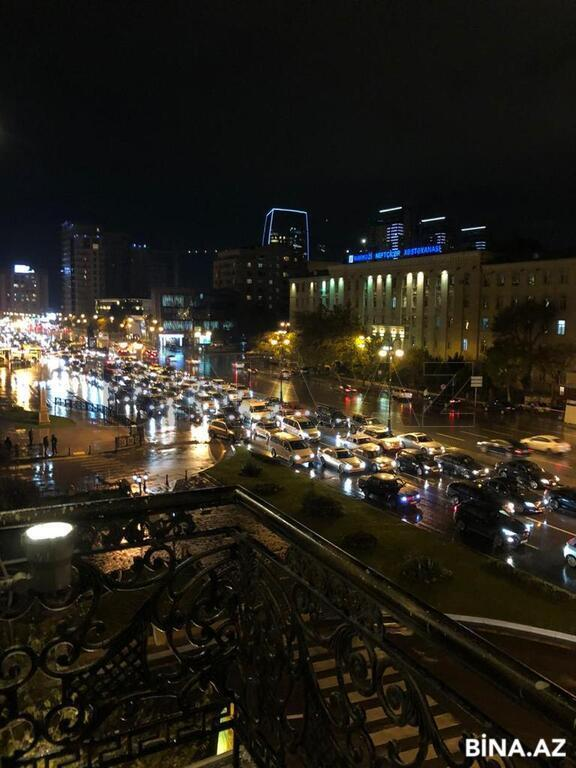

In [52]:
img

In [53]:
from torchvision import transforms

# Define the image transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [54]:
from torchvision import models
import torch.nn as nn
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Define the model architecture (replace TheModelClass with your actual model class)
class_names = ['not suitable', 'suitable']

model_binary = models.resnet18(pretrained=True)
num_ftrs = model_binary.fc.in_features
model_binary.fc = nn.Linear(num_ftrs, len(class_names))

# Move the model to the device
model_binary = model_binary.to(device)

# Load the trained weights
model_binary.load_state_dict(torch.load('/data/dss-data/managed_folders/MORTGAGEPRICECALCULATOR/Y2CfEnR1/model_unsampled.pt'))

# Set the model to evaluation mode
model_binary.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [55]:
multi_class_names = ['cox yaxsi', 'orta', 'pis', 'yaxsi']

model_multiclass = models.resnet18(pretrained=True)
num_ftrs = model_multiclass.fc.in_features
model_multiclass.fc = nn.Linear(num_ftrs, len(multi_class_names))

# Move the model to the device
model_multiclass = model_multiclass.to(device)

# Load the trained weights
model_multiclass.load_state_dict(torch.load('/data/dss-data/managed_folders/MORTGAGEPRICECALCULATOR/PUohl1AF/model_unsampled.pt'))

# Set the model to evaluation mode
model_multiclass.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

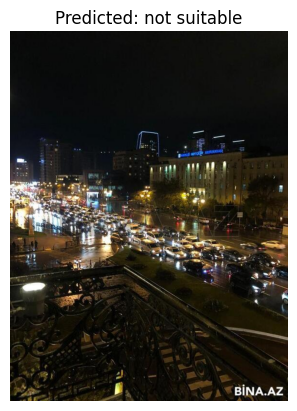

In [56]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math
from PIL import Image
import numpy as np

# Assuming you have defined preprocess, model_binary, and class_names

# Assuming img is a single PIL Image object
# Apply transformations to the image
input_tensor = preprocess(img)

# Convert the input tensor to a batch tensor
input_batch = torch.unsqueeze(input_tensor, 0)

# Move the input tensor to the device
input_batch = input_batch.to(device)

# Perform inference
with torch.no_grad():
    output = model_binary(input_batch)

# Get the predicted class index for the image
_, predicted_index = torch.max(output, 1)

# Map the index to the class name
predicted_class = class_names[predicted_index.item()]

# Display the image along with the predicted class
plt.imshow(np.array(img))  # Convert PIL Image to NumPy array for display
plt.axis('off')
plt.title(f'Predicted: {predicted_class}')
plt.show()


In [57]:
predicted_class

'not suitable'

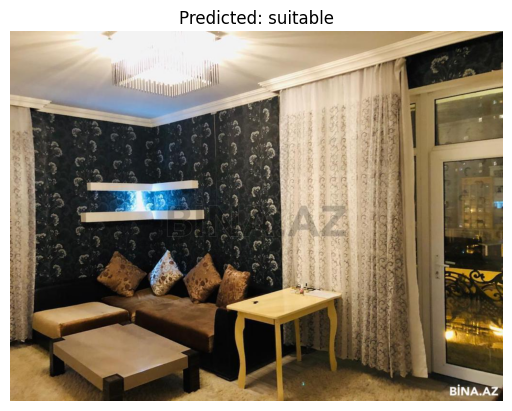

In [58]:
if predicted_class=='not suitable':
    image_tag = html.find_all('img')[1]  # Change the index accordingly

    image_url = image_tag['src'] if image_tag else None

    if image_url:
        img_data = requests.get(image_url).content
        img = Image.open(BytesIO(img_data))

        img_byte_array = BytesIO()
        img.save(img_byte_array, format='JPEG')

        input_tensor = preprocess(img)

        # Convert the input tensor to a batch tensor
        input_batch = torch.unsqueeze(input_tensor, 0)

        # Move the input tensor to the device
        input_batch = input_batch.to(device)

        # Perform inference
        with torch.no_grad():
            output = model_binary(input_batch)

        # Get the predicted class index for the image
        _, predicted_index = torch.max(output, 1)

        
        predicted_class = class_names[predicted_index.item()]

        # Display the image along with the predicted class
        plt.imshow(np.array(img))  # Convert PIL Image to NumPy array for display
        plt.axis('off')
        plt.title(f'Predicted: {predicted_class}')
        plt.show()


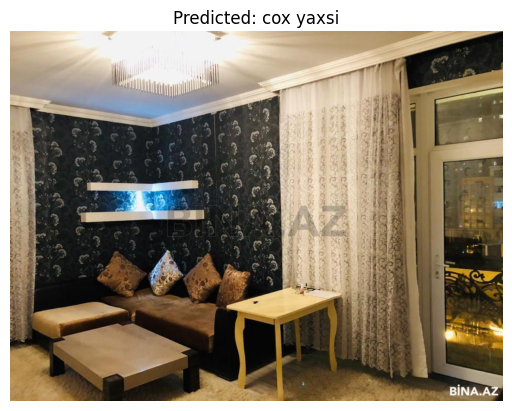

In [59]:
if predicted_class=='suitable':
    input_tensor = preprocess(img)

    # Convert the input tensor to a batch tensor
    input_batch = torch.unsqueeze(input_tensor, 0)

    # Move the input tensor to the device
    input_batch = input_batch.to(device)

    # Perform inference
    with torch.no_grad():
        output = model_multiclass(input_batch)

    # Get the predicted class index for the image
    _, predicted_index = torch.max(output, 1)


    predicted_class = multi_class_names[predicted_index.item()]

    # Display the image along with the predicted class
    plt.imshow(np.array(img))  # Convert PIL Image to NumPy array for display
    plt.axis('off')
    plt.title(f'Predicted: {predicted_class}')
    plt.show()

____

___